# EDA를 예측으로(DieTanic)

### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.*
    -Lisa Kleypas

                                                                                                                                     

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912년 4월 15일, 첫 항해 중 타이타닉호는 빙산과 충돌하여 침몰하여 승객과 승무원 2,224명 중 1,502명이 사망했습니다. 이것이 바로 **DieTanic**이라는 이름이 붙은 이유입니다.  이는 세상 누구도 잊을 수 없는 매우 잊을 수 없는 재난입니다.

타이타닉호를 만드는 데 약 750만 달러가 들었고 충돌로 인해 바다 밑으로 가라앉았습니다. Titanic Dataset은 초보자가 데이터 과학 분야의 여정을 시작하고 Kaggle 대회에 참가하는 데 매우 유용한 데이터세트입니다.

이 노트북의 목적은 **예측 모델링 문제의 워크플로가 어떤지** 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 기계 학습 개념을 추가하는 방법입니다. 나는 초보자라도 모든 단계를 이해할 수 있도록 노트북을 가능한 한 기본적으로 유지하려고 노력했습니다.

## 노트북 내용:

#### 1부: 탐색적 데이터 분석(EDA):
1) 특징 분석.

2) 여러 특징을 고려하여 관계나 추세를 찾습니다.
#### 2부: 특성 추출 및 데이터 정리:
1) 피처 엔지니어링을 통해 컬럼을 추가합니다.

2) 중복되는 기능을 제거합니다.

3) 모델링에 적합한 형태로 기능을 변환합니다.
#### 3부: 예측 모델링
1) Baseline 모델.

2) 교차 검증.

3) 앙상블.

4) 중요한 기능 추출.

## 1부: 탐색적 데이터 분석(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 데이터 불러오기
data=pd.read_csv('train.csv')

In [3]:
# 맨 앞에서 데이터 5개 읽기

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 컬럼별 null값 체크

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin 및 Embarked**에는 null 값이 있습니다.  
결측치를 어떻게 처리할지 고민해봐야 합니다.

### 몇 명이나 살아남았나요??

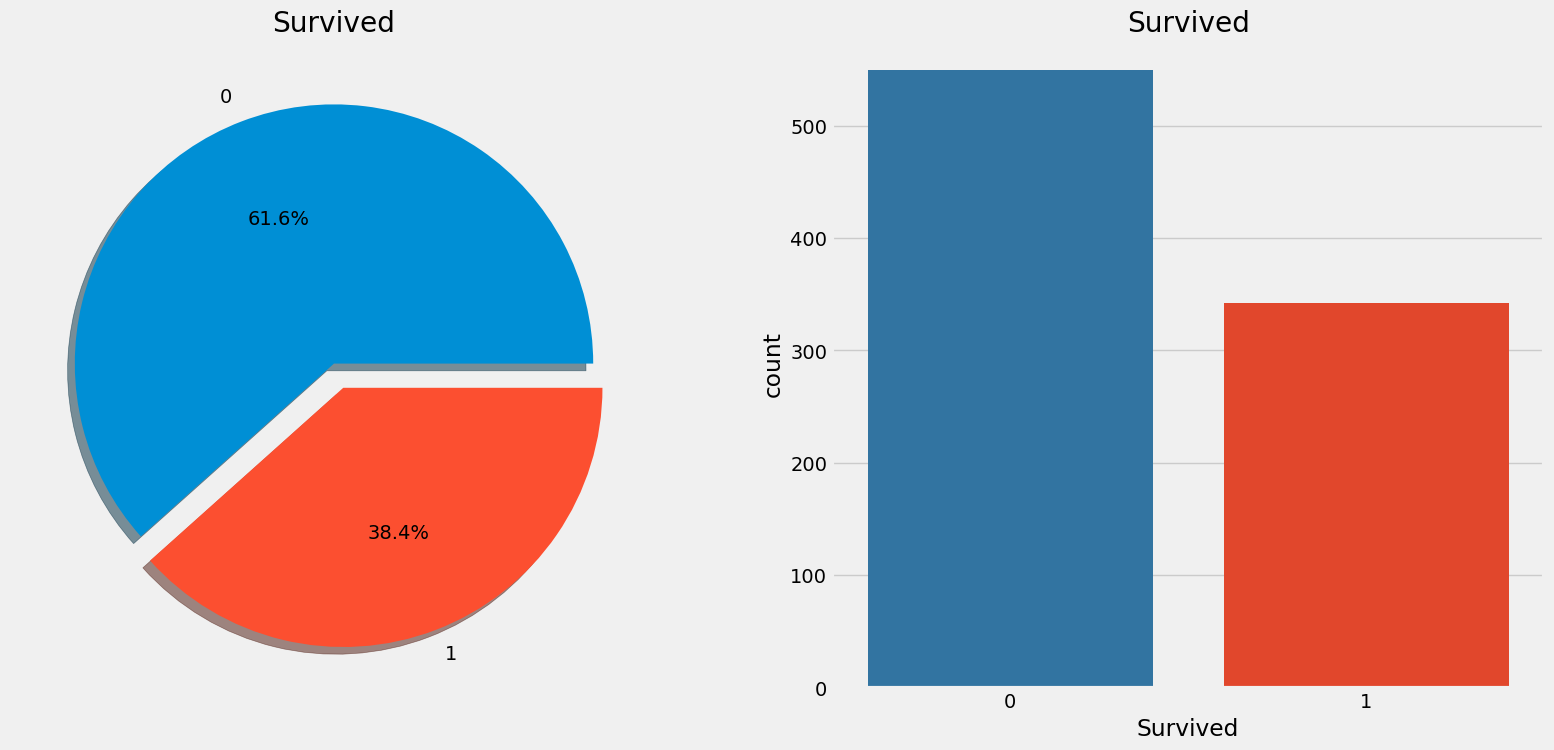

In [5]:
# 그래프 그리기 눈에 익혀두세요! (gpt를 통해 한 줄 한 줄 의미를 물어보는 것도 좋은 방법)
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1], palette=['#1f77b4', "#ff320e"])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 승객이 많지 않은 것은 분명합니다. 

훈련 세트에 포함된 891명의 승객 중 약 350명만이 생존했습니다. 즉, 전체 훈련 세트의 **38.4%** 만이 충돌 사고에서 살아 남았습니다. 데이터에서 더 나은 통찰력을 얻고 어떤 범주의 승객이 생존했고 누가 살아남지 않았는지 확인하려면 더 자세히 조사해야 합니다.

데이터세트의 다양한 특징을 활용하여 생존율을 확인해 보겠습니다. 성별, 승선항, 연령 등의 일부 기능이 있습니다.

먼저 다양한 유형의 기능을 이해하겠습니다.

## 기능 유형

### Categorical Features:
범주형 변수는 두 개 이상의 범주가 있고 해당 특성의 각 값을 범주별로 분류할 수 있는 변수입니다. 예를 들어 성별은 두 가지 범주(남성과 여성)가 있는 범주형 변수입니다. 이제 그러한 변수를 정렬하거나 순서를 지정할 수 없습니다. **명목변수**라고도 합니다.

**데이터세트의 범주형 특징: 성별, 승선.**

### Ordinal Features:
순서형 변수는 범주형 값과 유사하지만, 값 간의 상대적 순서 또는 정렬이 가능하다는 차이점이 있습니다. 예를 들어 **높이**와 같은 특성에 **키가 크고, 중간이고, 짧습니다** 값이 있는 경우 키는 순서형 변수입니다. 여기서 우리는 변수에 상대 정렬을 적용할 수 있습니다.

**데이터세트의 순서 기능: PClass**

### Continous Feature:
특성(피처)의 두 지점 사이 또는 최소값이나 최대값 사이의 값을 취할 수 있는 경우 특성이 연속적이라고 합니다.

**데이터세트의 연속 특징: 연령**

## 피처 분석

## sex(성별) --> Categorical Feature(범주형 특성)

In [6]:
# 그룹화를 통해 성별-생존율(0,1)에 대해 전체 생존율 값을 구하기

data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

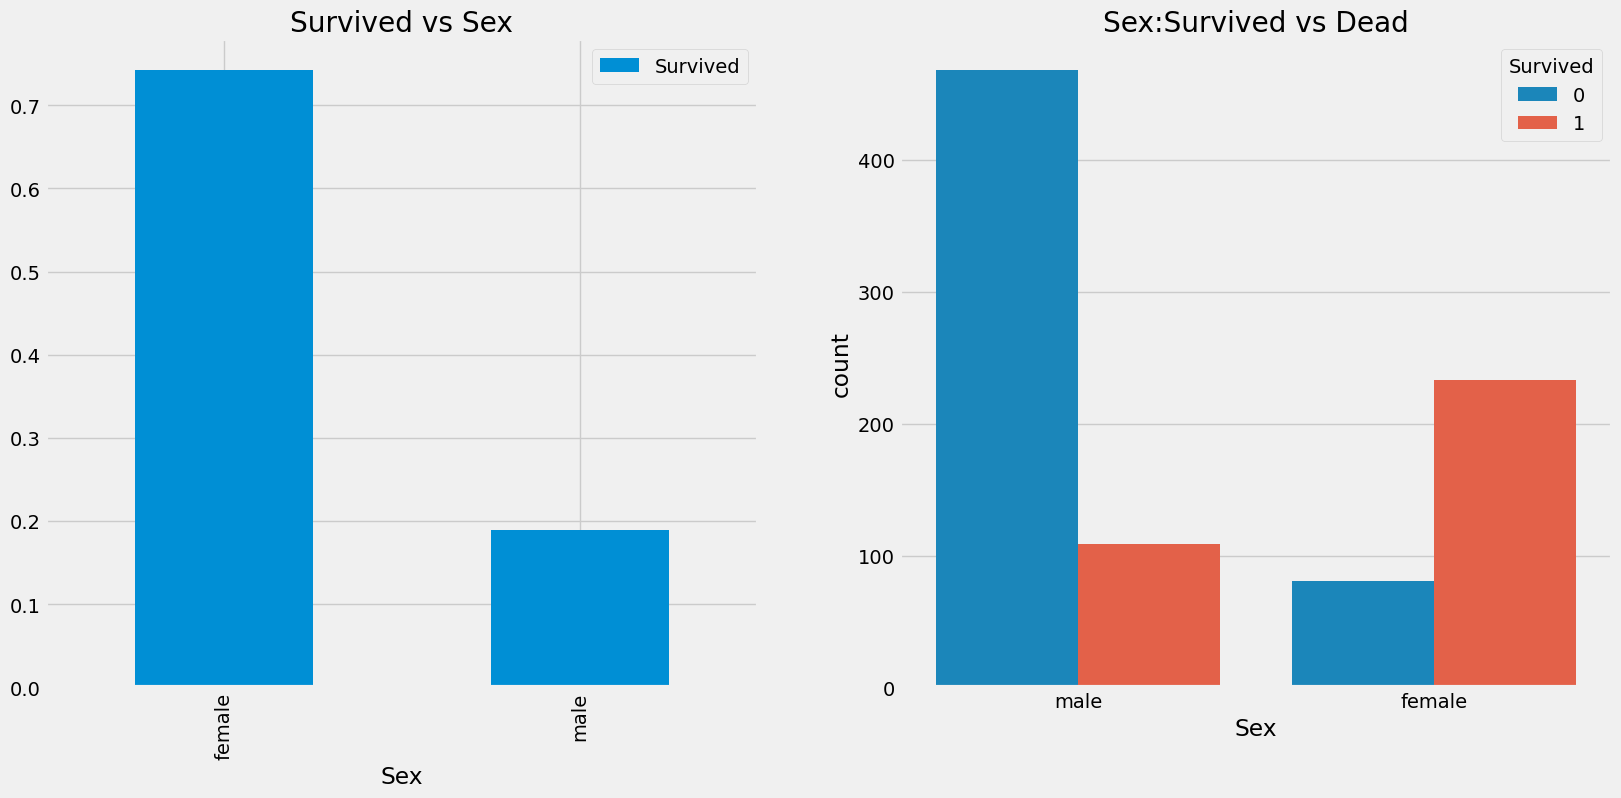

In [7]:
# 마찬가지로 그래프 사용 방법을 확인해보세요!
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

재미있어 보이네요. 배에는 남자의 수가 여자의 수보다 훨씬 많습니다. 그럼에도 불구하고 구조된 여성의 수는 구조된 남성 수의 거의 두 배에 이릅니다. **배에 탄 여성의 생존율은 약 75%인 반면 남성의 생존율은 약 18~19%입니다.**

이는 모델링에 있어 **매우 중요한** 피처인 것 같습니다. 그런데 이게 최선일까요??   다른 피처를 확인해 보겠습니다.

## 객실 등급 --> Ordinal Feature

In [10]:
# pd.crosstab은 범주형 변수 간의 관계를 요약하고 시각화 할 때 사용해요.
# """
# pclas는 1,2,3 이라는 3개의 범주 값을 가지고 있고, survived는 0,1 2개의 범주 값을 가지고 있죠.
# 그래서 각 pclass마다의 비생존/생존의 개수를 알고싶을 때 사용하면 좋아요.
# """
#pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# 여러분들이 직접 작성해보세요.

pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


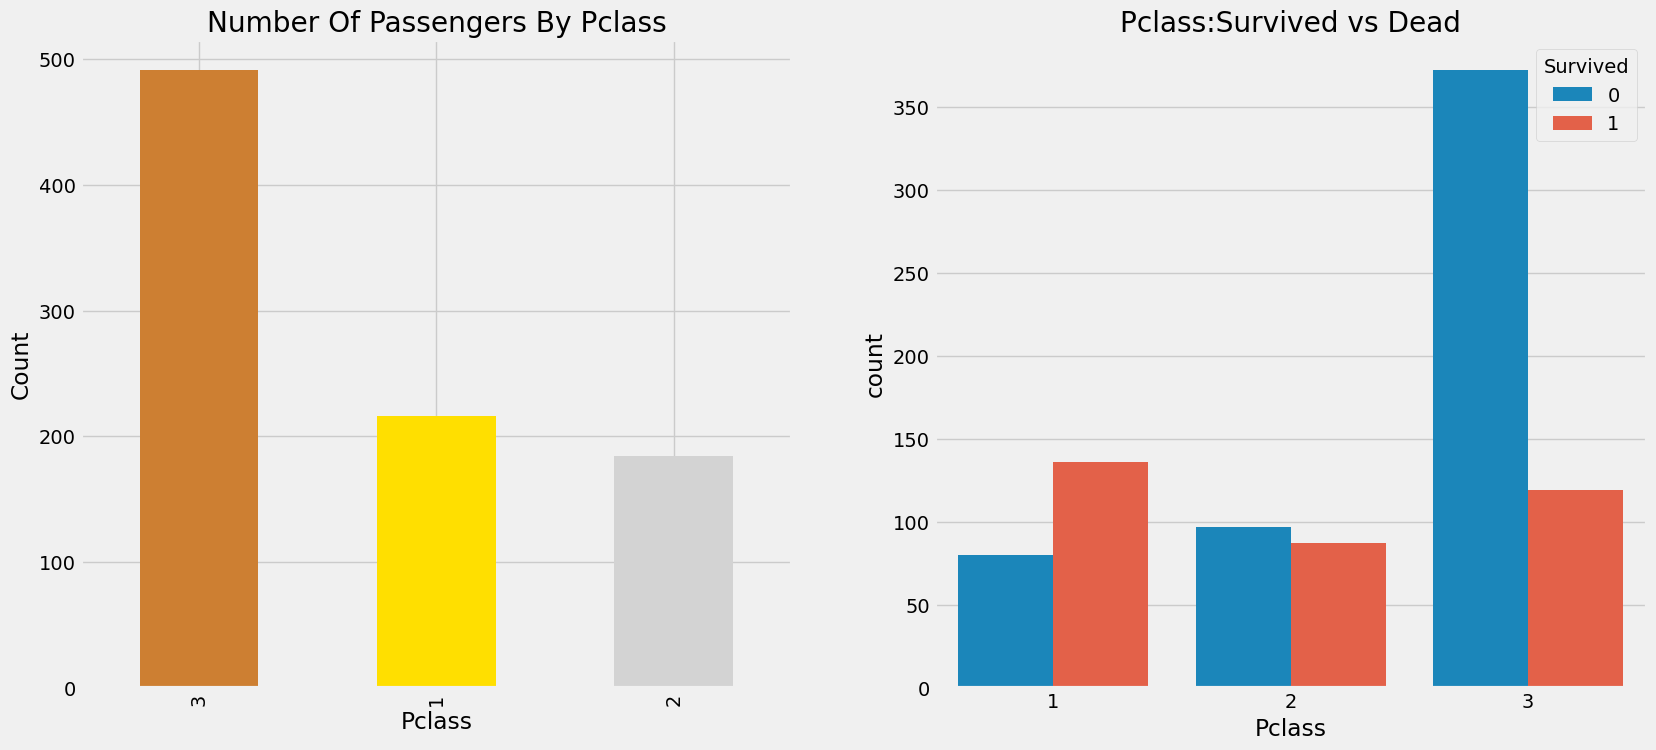

In [11]:
# 이제 그래프가 계속 반복적으로 진행되는게 느껴지시죠?
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 **돈으로 모든 것을 살 수는 없습니다** 라고 말합니다. 그러나 우리는 객실 등급 1의 승객이 구조되는 동안 매우 높은 우선순위를 부여받았다는 것을 분명히 볼 수 있습니다. 객실 등급 3의 승객 수가 훨씬 많았음에도 불구하고 생존율은 **25%** 정도로 매우 낮습니다.

객실 등급 1의 생존율은 약 **63%** 인 반면 객실 등급2의 경우 약 **48%** 입니다. 그래서 돈과 지위가 중요합니다. 이런 물질주의적인 세상.

조금 더 자세히 살펴보고 다른 흥미로운 관찰 내용을 확인해 보겠습니다. **Sex and 객실 등급** 로 생존율을 함께 확인해 볼까요?

In [13]:
# 생김새가 익숙하네요. pd.crosstab을 활용하면 될 것 같은데요?
# 성별-생존에 대해서 class별로 알고싶은 느낌이네요

pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

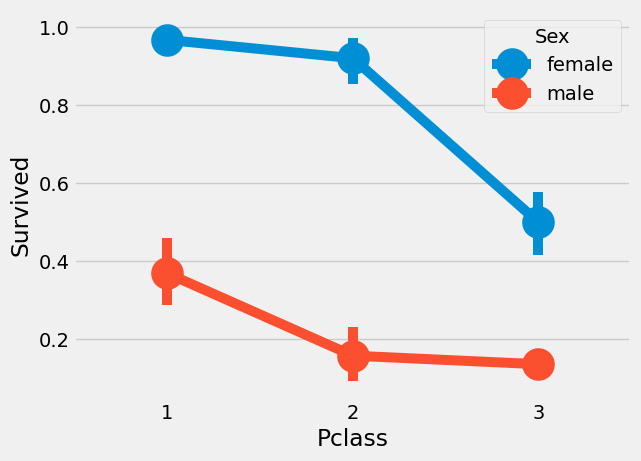

In [14]:
# pointplot은 친숙하게 볼 수 있는 그래프에요. 사용방법을 익혀둡시다.
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.show()

이 경우에는 범주형 값을 쉽게 분리할 수 있는 **PointPlot** 을 사용합니다.

**CrossTab** 및 **PointPlot**을 살펴보면 객실 등급1 여성 94명 중 3명만이 사망했기 때문에 **객실 등급1 여성**의 생존율이 약 **95-96%**임을 쉽게 추론할 수 있습니다. 

구조 시에는 P등급과 관계없이 여성이 최우선적으로 고려되는 것은 분명합니다. 객실 등급1의 남성들조차 생존율이 매우 낮습니다.

객실 등급도 중요한 기능인 것 같습니다. 다른 기능을 분석해 보겠습니다.

## 연령--> Continous Feature

In [24]:
# data[age]에 차례대로 최대 최소 평균을 찍어보세요.
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


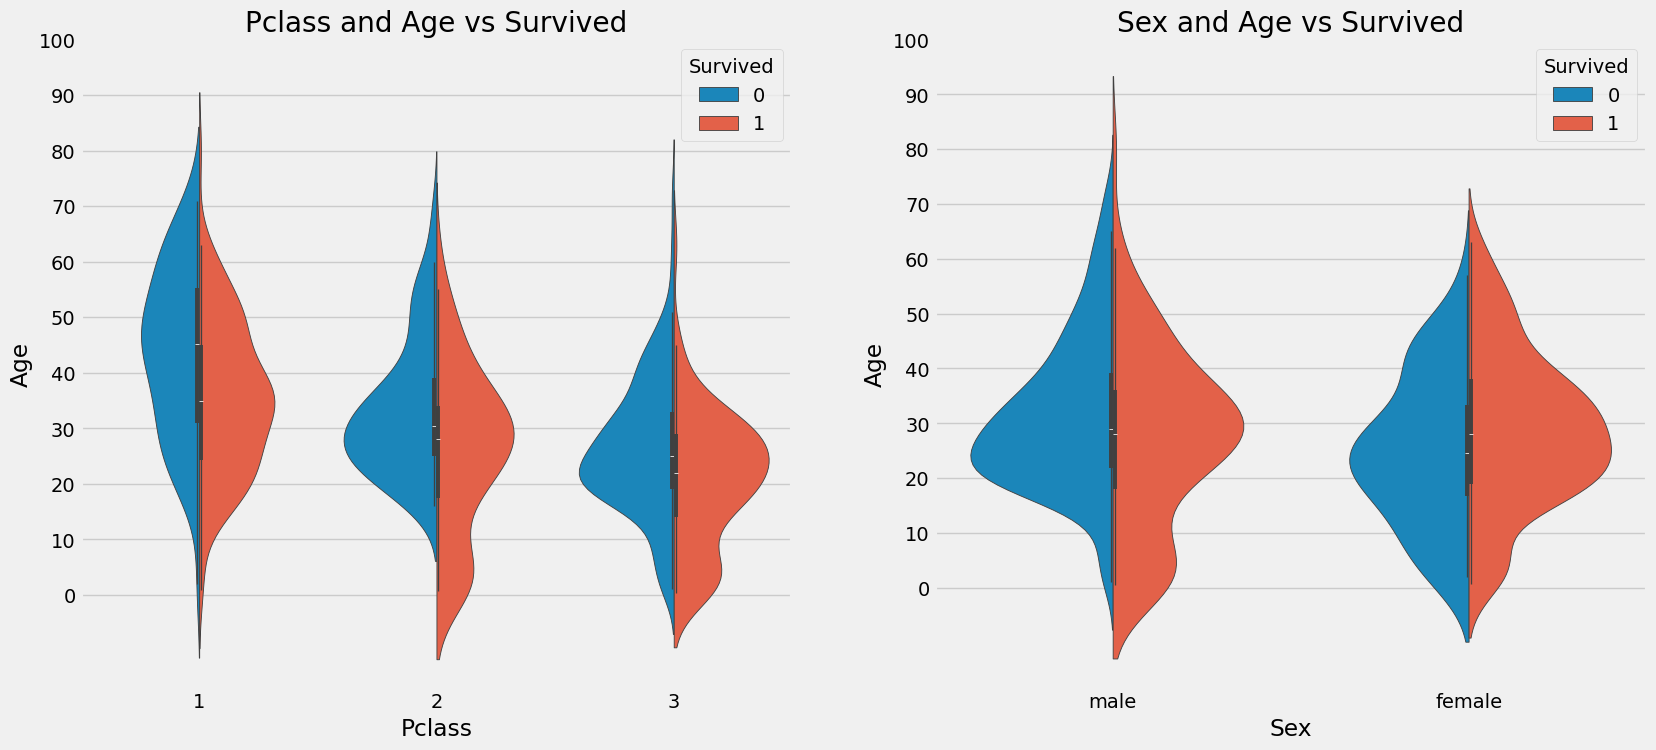

In [ ]:
# 기술통계와 분포를 한 번에 볼 수 있는 바이올린 플랏에 대해서 찾아보세요!
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 관찰:

1) 객실 등급에 따라 어린이 수가 증가하는데, 10세 미만 승객(즉, 어린이)의 생존율은 객실 등급과 관계없이 양호한 것으로 보인다.

2) 객실 등급1의 20-50세 승객의 생존 가능성은 높으며 여성의 경우 더욱 좋습니다.

3) 남자의 경우 나이가 들수록 생존율이 감소한다.

앞에서 본 것처럼 Age 기능에는 **177** null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있습니다.

그런데 문제는 다양한 연령대의 사람들이 많았다는 것입니다. 우리는 4살 아이에게 평균 연령을 29살로 지정할 수 없습니다. 승객이 어떤 연령대에 속해 있는지 알아낼 수 있는 방법이 있나요?

**빙고!!!!** **이름** 기능을 확인할 수 있습니다. 특징을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균 값을 각 그룹에 할당할 수 있습니다.

**''이름에는 무엇이 들어있나요??''**---> **기능** :p

In [25]:
# 이름을 . 기준으로 추출하는 방식을 알아볼거에요. 정규표현식이 어떤건지 기억나시죠?
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

좋습니다. 여기서는 Regex: **[A-Za-z]+)\.**를 사용합니다. 그래서 이것이 하는 일은 **A-Z 또는 a-z** 사이에 있고 그 뒤에 **.(점)**이 오는 문자열을 찾는 것입니다. 따라서 이름에서 이니셜을 성공적으로 추출했습니다.

In [26]:
# 이제 pd.crosstab을 사용해보세요!
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


알겠습니다. Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 잘못된 이니셜이 있습니다. 이를 Miss로 바꾸겠습니다. 다른 값도 마찬가지입니다.

In [ ]:
# inplace는 변경사항을 원본에 바로 저장하는 의미에요!
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
# 그룹화 하기 위해서는 groupby를 사용!
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### NaN 시대 채우기

In [ ]:
"""
결측치를 채우는 방식은 여러가지 방식이 있어요.
fillna()도 있지만 지금처럼 그룹별로 채우려면 
나이 데이터가 없는 행 + 호칭이 "Mr"인 경우는 33으로 채우기 이렇게 필터링을 통해서 채우려고 할 때 어떻게 채워지는지 확인해보세요!
"""
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33

In [27]:
# 결측치가 있는지 확인해볼까요?
data.Age.isnull().any()

np.True_

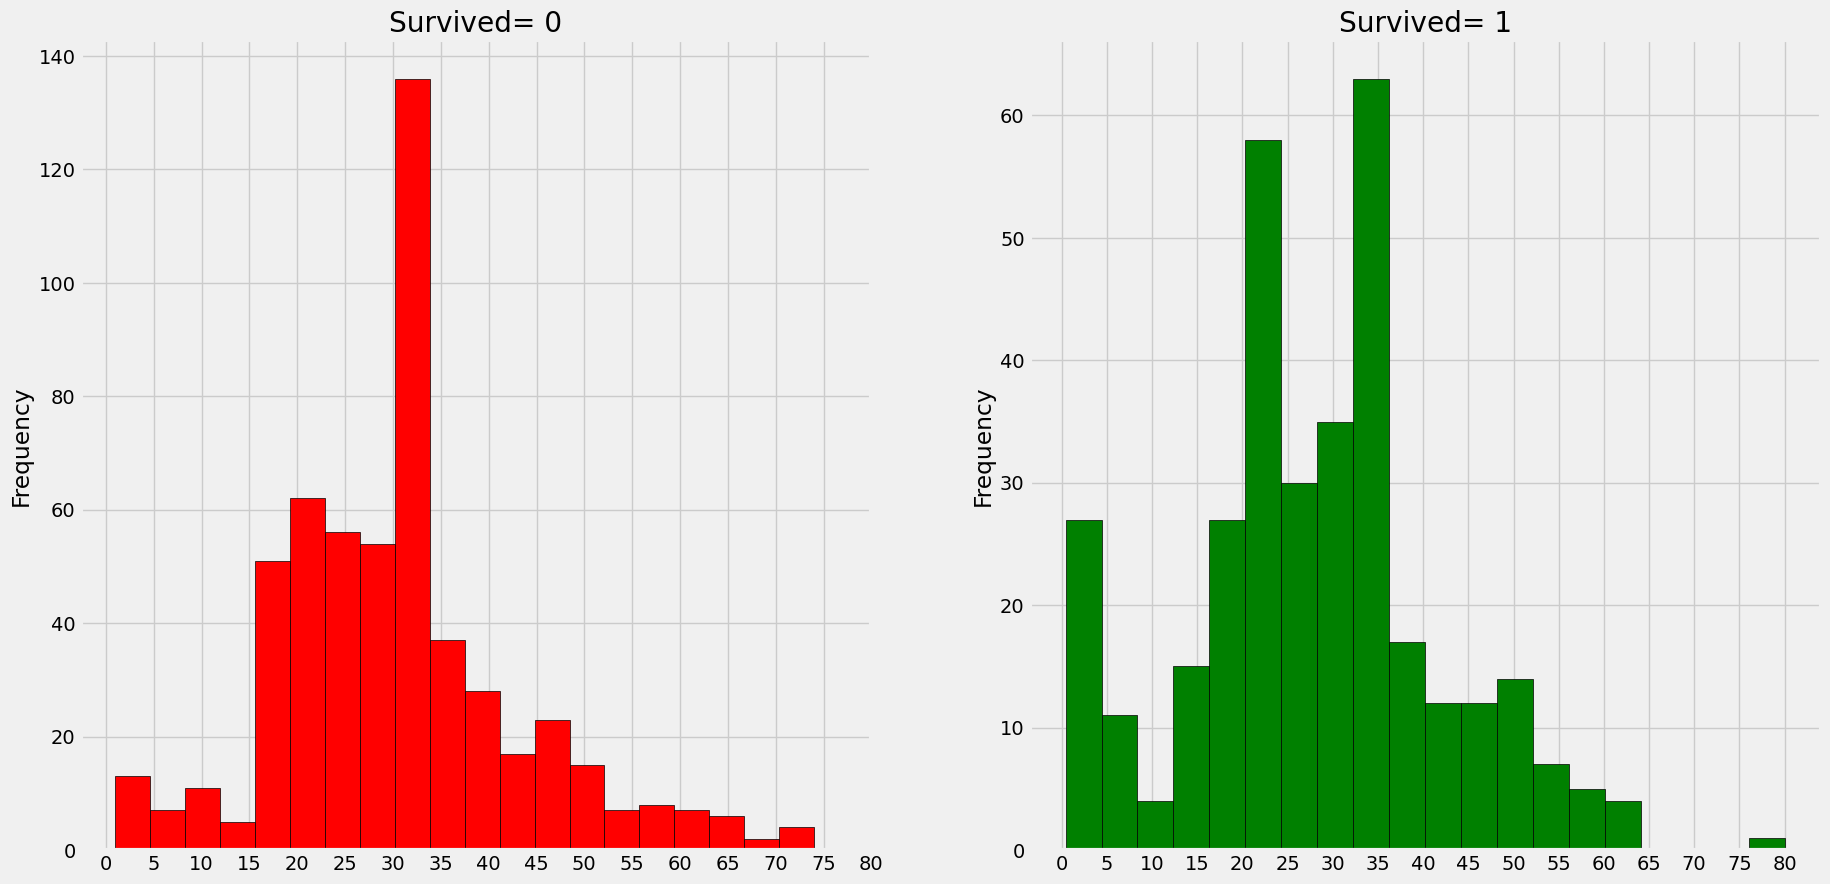

In [ ]:
# 그래프 그리기 gpt를 활용하는 건 아주 좋은 방법이겠죠?
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 관찰:
1) 유아(5세 미만)를 대량으로 구출하였다(여성 및 아동 우선 정책).

2) 최고령 승객이 구출되었습니다(80세).

3) 최대 사망자 수는 30~40세 연령층에서 나타났습니다.

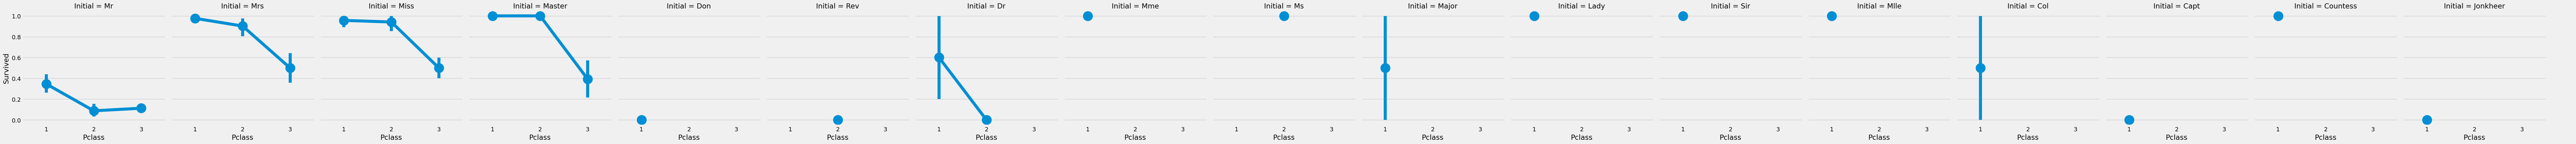

In [29]:
# catplot은 범주형, 수치형등에서 관계를 표현할 때 주로 사용해요. 서브플롯을 자동으로 생성하는게 장점이죠.
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

따라서 여성과 아동 우선 정책은 계층에 관계없이 적용됩니다.

## 승선항--> Categorical Feature

In [30]:
# crosstab은 이제 지긋지긋하죠? 
# 배경 부분을 숫자에 따라 진하게 혹은 연하게 칠하고 싶다면 .style.background_gradient(cmap='summer_r')을 활용해봐요!
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 승선항별 생존 가능성

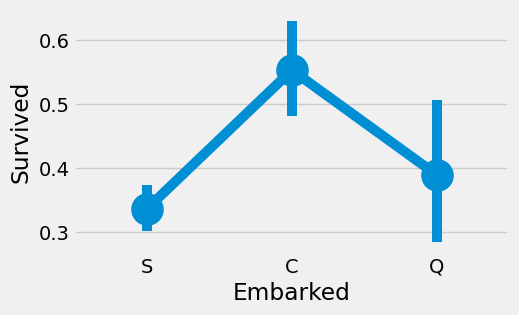

In [31]:
# pointplot을 이제 만들어봅시다!
sns.pointplot(x='Embarked',y='Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

항구 C의 생존 확률은 약 0.55로 가장 높고 S는 가장 낮습니다.

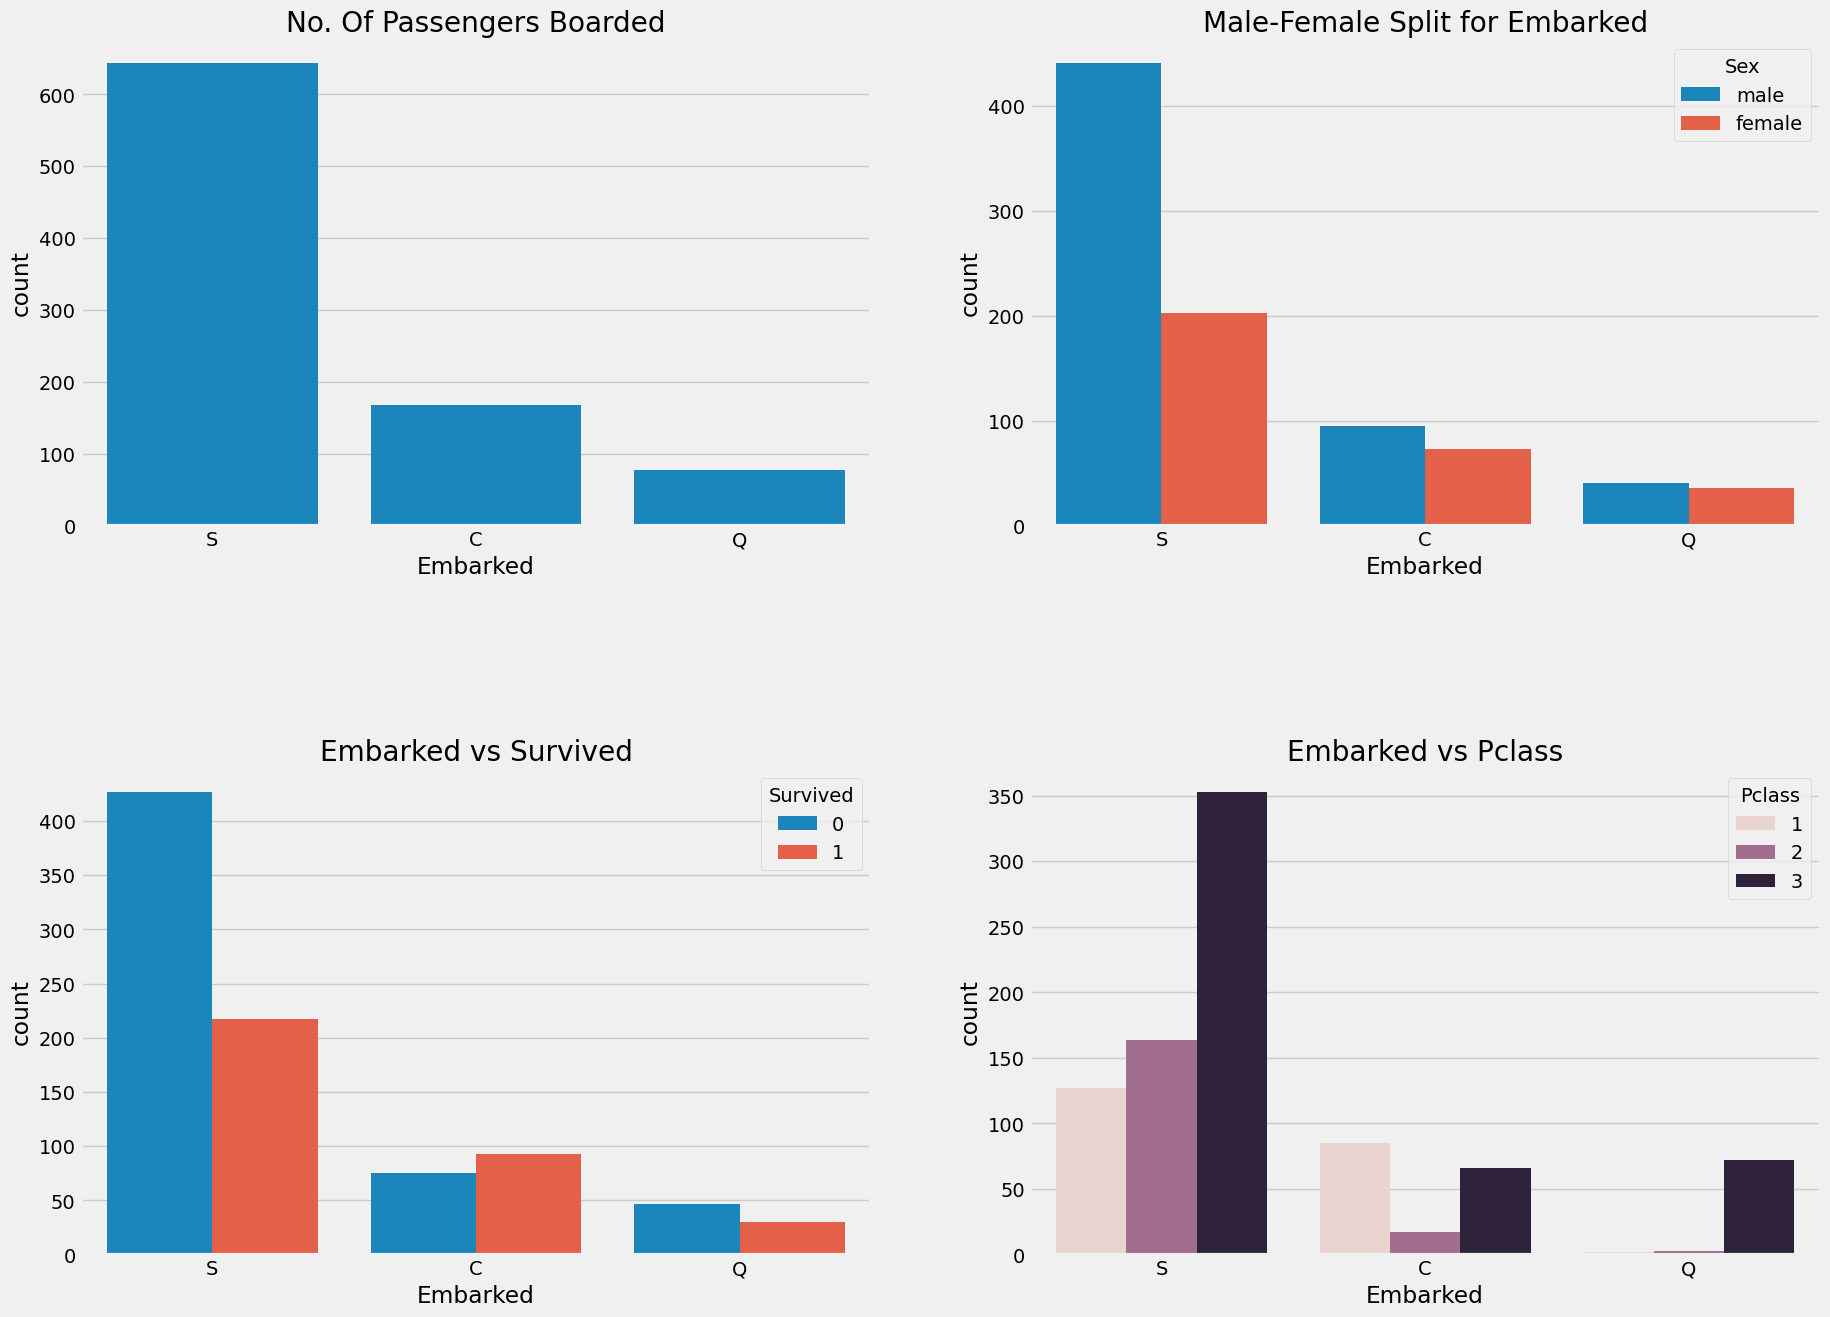

In [ ]:
# 이제 적응이 되시나요?
# f랑 ax가 뭔가요?
# f는 figure 캔버스 판이라고 생각할 수 있구요. ax는 실제 그림을 그리는 개별 캔버스에요!
# 즉 전체 도면(f)를 2x2로 나누겠다는거고 ax는 2x2 즉 4개의 캔버스가 생기생기는거죠 
f,ax=plt.subplots(2,2,figsize=(20,15))죠
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### 관찰:
1) S에서 탑승하는 최대 승객은 대부분 객실 등급3입니다.

2) C에서 온 승객들은 상당수가 살아남았기 때문에 운이 좋아 보입니다. 그 이유는 아마도 객실 등급1과 객실 등급2 승객 모두를 구조하기 위해서일 것입니다.

3) Embark S는 대부분의 부자들이 탑승했던 항구를 바라보고 있습니다. 여전히 생존 가능성은 낮습니다. 이는 약 **81%** 객실 등급3의 많은 승객이 생존하지 못했기 때문입니다. 

4) Q항의 승객 중 거의 95%가 객실 등급3 출신이었습니다.

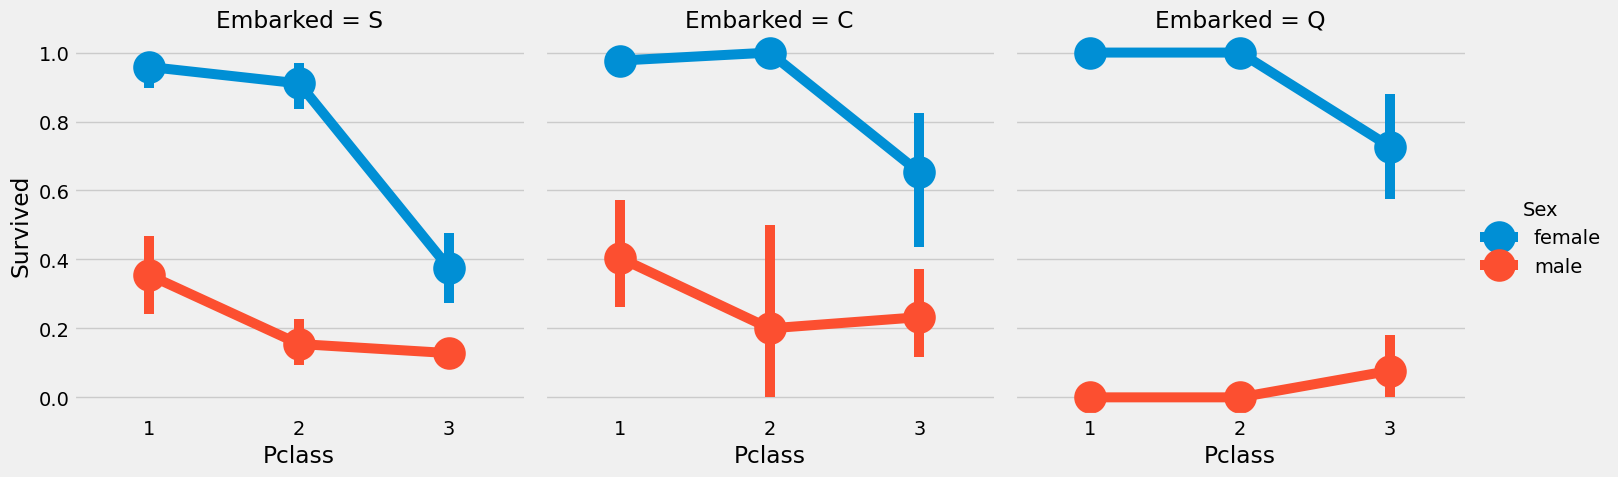

In [33]:
# 이제 catplot도 적응됐죠?
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

### 관찰:

1) 객실 등급1과 객실 등급2 모두 객실 등급와 관계없이 여성의 생존 확률은 거의 1이다.

2) 항구 S는 남성과 여성 모두 생존율이 매우 낮기 때문에 객실 등급3 승객에게는 매우 불운한 것으로 보입니다.**(돈 문제)**

3) 항구 Q는 거의 모두 객실 등급 3 출신이므로 남성에게는 가장 좋지 않은 것 같습니다.

### 착수된 NaN 채우기

Port S에서 탑승한 최대 승객 수를 확인하여 NaN을 S로 대체합니다.

In [34]:
# 결측치를 한 번에 채우려면?!
data['Embarked'].fillna('S',inplace=True)

In [35]:
# 이제 결측치가 없어졌나 확인이 필요하겠죠?
data.Embarked.isnull().any()

np.False_

## SibSip-->Discrete Feature
이 기능은 개인이 혼자 있는지 아니면 가족과 함께 있는지를 나타냅니다.

형제자매 = 형제, 자매, 이복형제, 이복자매

배우자 = 남편, 아내

In [36]:
# crosstab 
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
# 피벗 테이블로 동일한 결과를 만들어봅시다!

In [ ]:
# 그룹바이로 동일한 결과를 만들어봅시다!

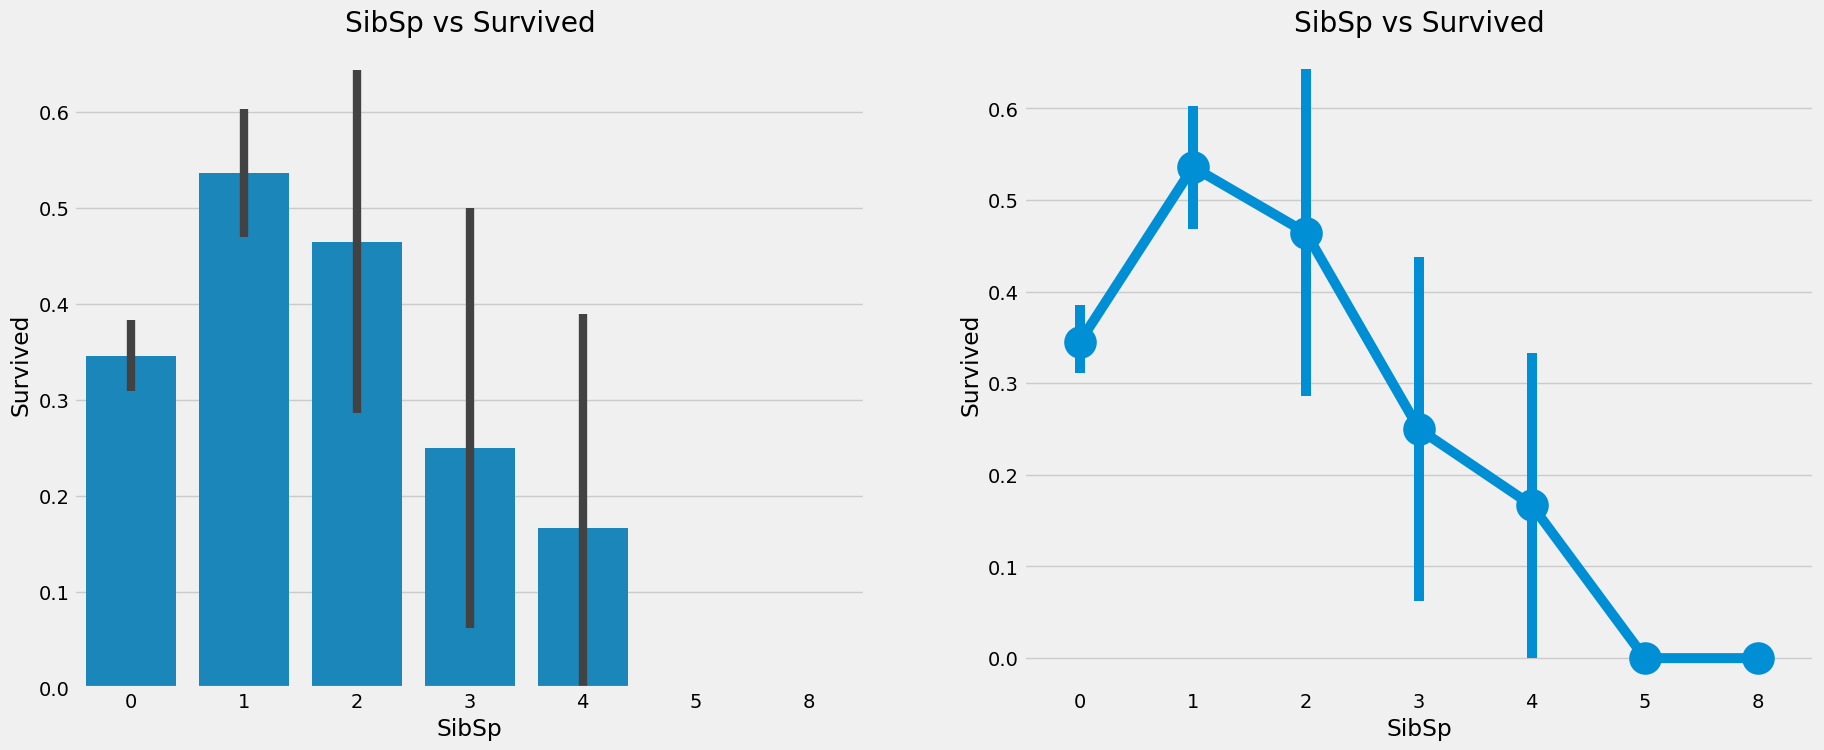

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [37]:
# 이제는 여러분들이 원하는 방식으로 만들어보세요!
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 관찰:


막대 그래프와 요인 그림은 승객이 형제자매 없이 혼자 탑승한 경우 생존율이 34.5%임을 보여줍니다. 형제 수가 증가하면 그래프가 대략적으로 감소합니다. 이것은 의미가 있습니다. 즉, 내 배에 가족이 있다면 나 자신을 먼저 구하는 대신 가족을 구하려고 노력할 것입니다. 놀랍게도 5~8인 가족의 생존율은 **0%** 입니다. 그 이유는 무엇일까요??

그 이유는 **객실 등급** 때문입니다. 크로스탭은 형제·배우자 수>3인 사람이 모두 객실 등급3에 있음을 보여줍니다. 객실 등급3(>3)의 대가족은 거의 전부 사망했습니다.

## 함께 탑승한 부모 수(parch)

In [38]:
# 이제는 여러분들이 원하는 방식으로 만들어보세요!
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


교차 분석에서는 객실 등급3에 더 큰 가족이 포함되어 있음을 다시 보여줍니다.

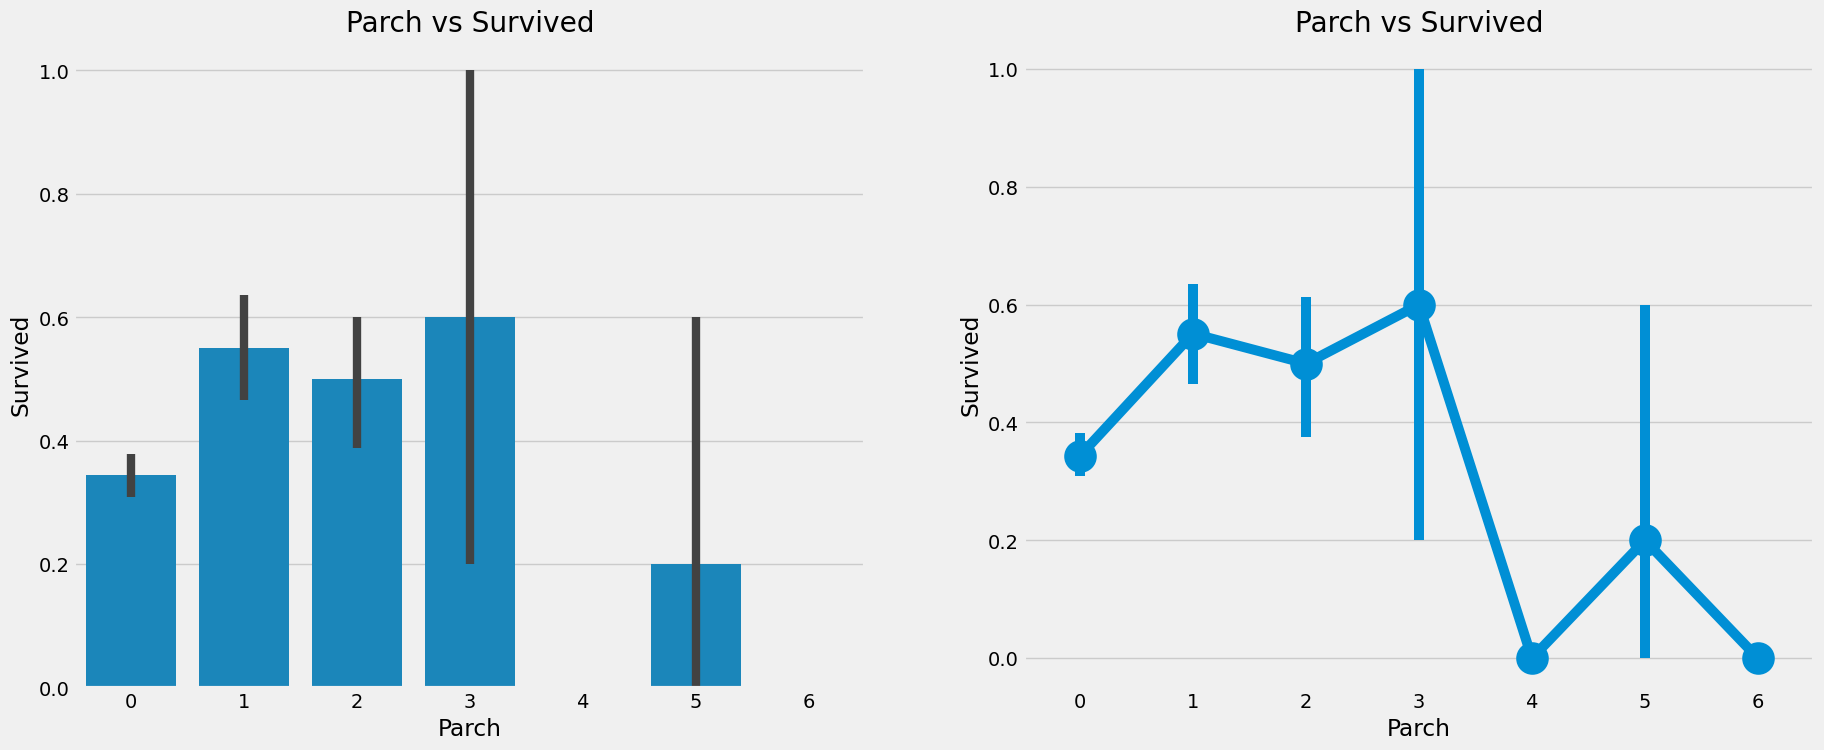

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### 관찰:

여기에서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라갈수록 감소합니다.

배에 1~3명의 부모가 있는 사람에게는 생존 가능성이 높습니다. 혼자 있는 것도 치명적이며 배에 부모가 4명 이상 있으면 생존 가능성이 감소합니다.

## 요금-->Continous Feature

In [39]:
# 빈칸 채워넣기! Fare를 최대 최소 평균을 출력하기!
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 요금은 **0.0**입니다. 우와!! 무료로 럭셔리한 라이딩을 즐겨보세요.

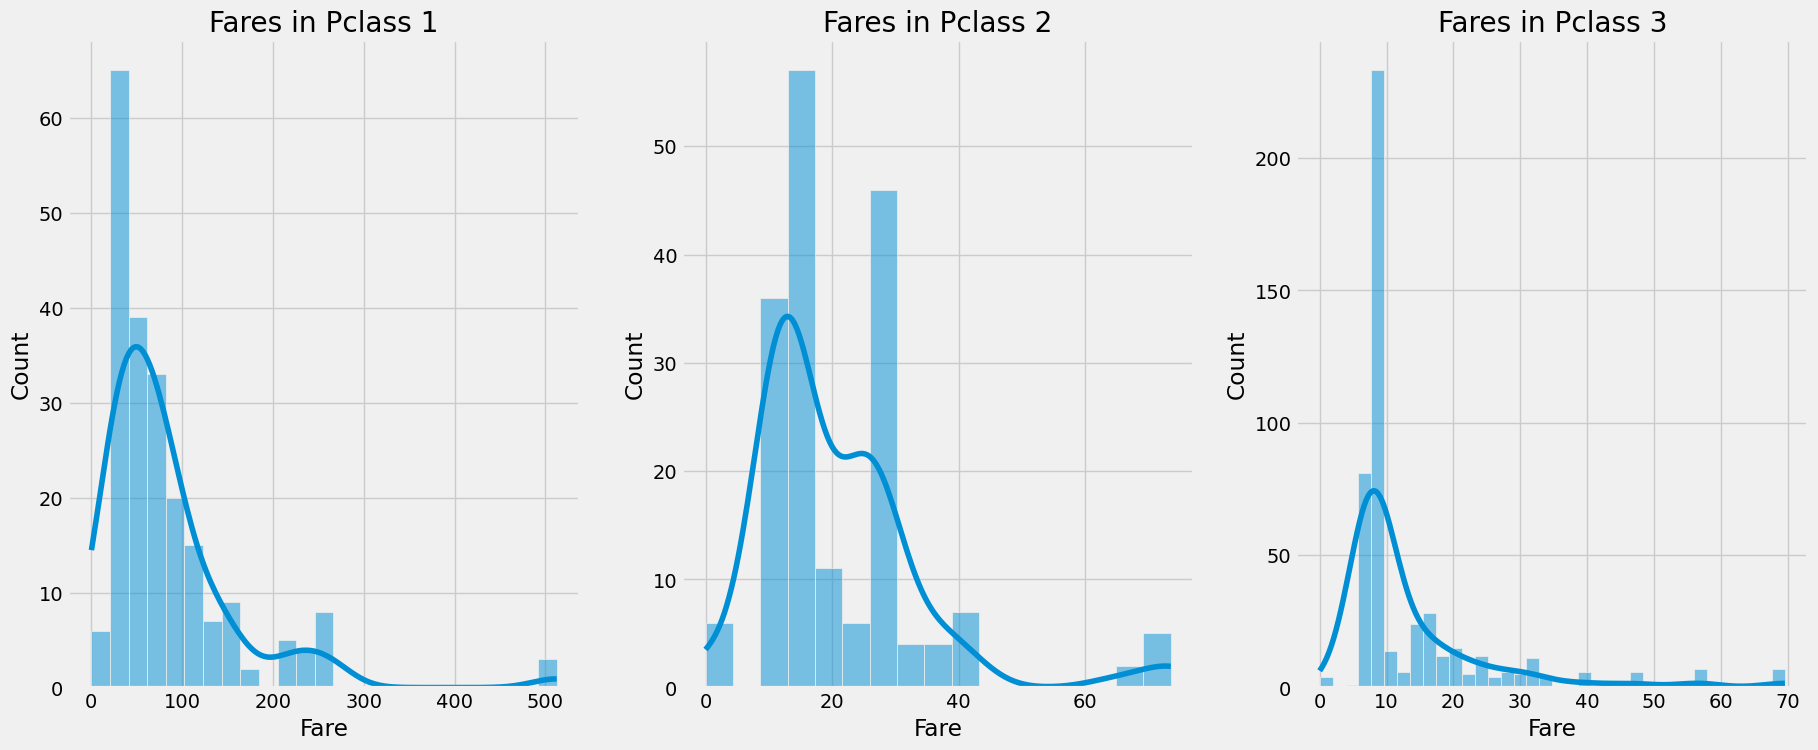

In [60]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Pclass 1
sns.histplot(data[data['Pclass']==1].Fare, ax=ax[0], kde=True)
ax[0].set_title('Fares in Pclass 1')

# Pclass 2
sns.histplot(data[data['Pclass']==2].Fare, ax=ax[1], kde=True)
ax[1].set_title('Fares in Pclass 2')

# Pclass 3
sns.histplot(data[data['Pclass']==3].Fare, ax=ax[2], kde=True)
ax[2].set_title('Fares in Pclass 3')

plt.show()


객실 등급1의 승객 운임에는 큰 분포가 있는 것으로 보이며 이러한 분포는 표준이 감소함에 따라 계속 감소합니다. 이것도 연속적이므로 비닝을 사용하여 이산형 값으로 변환할 수 있습니다.

## 모든 피처에 대한 간략한 관찰:
**성별:** 여성의 생존 확률은 남성에 비해 높습니다.

**객실 등급:** **1등석 승객** 이 되면 생존 가능성이 더 높아진다는 가시적인 추세가 있습니다. **객실 등급3의 생존율은 매우 낮습니다**. **여성**의 경우 **객실 등급1**의 생존 확률은 거의 1에 가깝고 **객실 등급2**의 경우에도 높습니다.   **돈이 승리합니다!!!**. 

**연령:** 5~10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다.

**승선항:** 이것은 매우 흥미로운 기능입니다. **C에서의 생존 가능성은 대다수의 객실 등급1 승객이 S에서 일어났음에도 불구하고 더 나은 것으로 보입니다.** Q의 승객은 모두 **객실 등급3** 출신이었습니다. 

**부모·자녀 수+형제·배우자 수:** 1~2명의 형제자매, 배우자 또는 부모 1~3명이 혼자 있거나 대가족이 함께 여행하는 것보다 가능성이 더 높습니다.

## 피처 간의 상관 관계

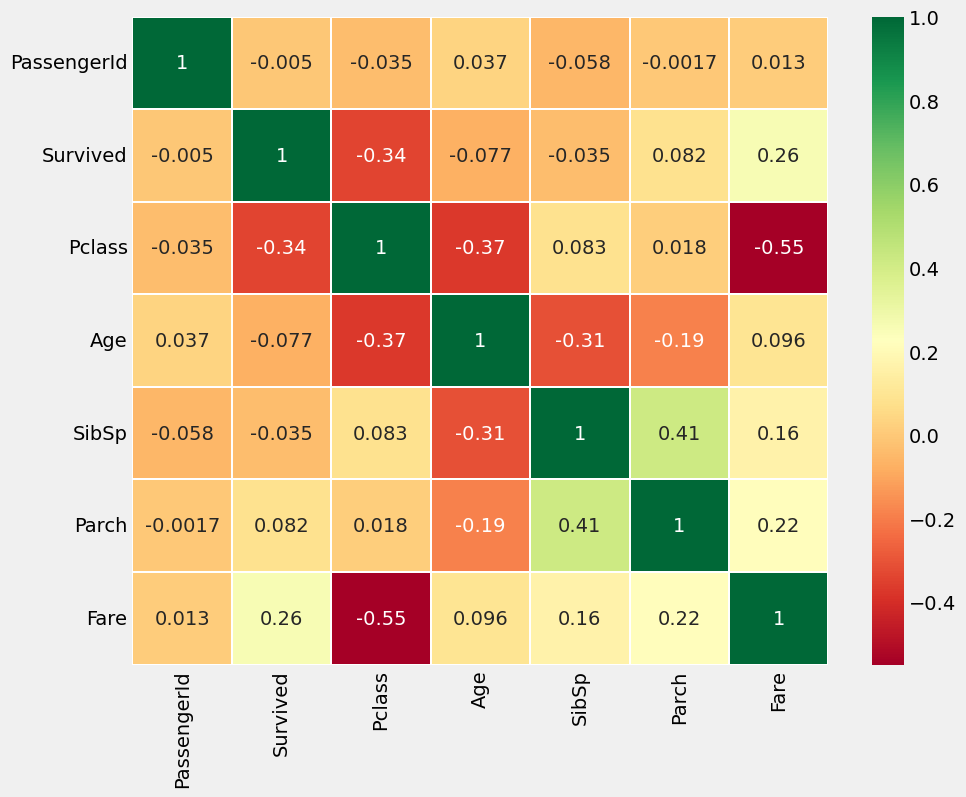

In [40]:
# 히트맵을 찍어볼까요? 히트맵정도는 직접 찍어봐야죠!
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석

가장 먼저 주목해야 할 점은 알파벳이나 문자열 사이의 상관 관계가 없다는 것이 명백하기 때문에 숫자 특징만 비교한다는 것입니다. 플롯을 이해하기 전에 정확히 상관관계가 무엇인지 살펴보겠습니다.

**양의 상관 관계:** **특성 A의 증가가 특성 B의 증가로 이어지는 경우 양의 상관 관계가 있습니다**. 값 **1은 완벽한 양의 상관관계**를 의미합니다.

**음의 상관 관계:** **특성 A의 증가로 인해 특성 B의 감소로 이어지는 경우 음의 상관 관계가 있습니다**. **-1 값은 완벽한 음의 상관관계**를 의미합니다.

이제 두 기능이 매우 또는 완벽하게 상관되어 있으므로 하나의 기능이 증가하면 다른 기능도 증가한다고 가정해 보겠습니다. 이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 없거나 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하므로 이를 **다중공선성**이라고 합니다.

**그중 하나는 중복**되므로 둘 다 사용해야 한다고 생각하십니까? 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점이 줄어들기 때문에 중복되는 기능을 제거하려고 노력해야 합니다.

이제 위의 히트맵을 보면 기능 간의 상관관계가 별로 없음을 알 수 있습니다. 가장 높은 상관관계는 **형제·배우자 수와 부모·자녀 수 사이, 즉 0.41**입니다. 따라서 우리는 모든 기능을 계속 사용할 수 있습니다.

## 2부: 특성 추출 및 데이터 정리

피처 엔지니어링이란 무엇일까?

특성이 포함된 데이터 세트가 제공될 때마다 모든 특성이 중요할 필요는 없습니다. 제거해야 할 중복 특성이 많이 있을 수 있습니다. 또한 다른 특성에서 정보를 관찰하거나 추출하여 새로운 특성을 얻거나 추가할 수도 있습니다.

예를 들어 이름 기능을 사용하여 이니셜 기능을 가져오는 경우가 있습니다. 새로운 기능을 얻고 몇 가지를 제거할 수 있는지 살펴보겠습니다. 또한 기존 관련 기능을 예측 모델링에 적합한 형태로 변환할 것입니다.

## 연령_대

#### 연령 기능 관련 문제:
앞에서 **나이는 연속적인 특성**이라고 언급했듯이 머신러닝 모델의 연속 변수에는 문제가 있습니다.

**예:** 스포츠맨을 **성별**별로 그룹화하거나 정리하면 남성과 여성으로 쉽게 구분할 수 있습니다.

이제 **나이**별로 그룹화하라고 하면 어떻게 하시겠습니까? 30명의 사람이 있는 경우 연령 값은 30개일 수 있습니다. 이제 이것이 문제가 됩니다.

비닝 또는 정규화를 통해 이러한 **연속 값을 범주형 값**으로 변환해야 합니다. 저는 구간화를 사용할 것입니다. 즉, 다양한 연령대를 단일 구간으로 그룹화하거나 단일 값을 할당할 것입니다.

좋습니다. 승객의 최대 연령은 80세였습니다. 따라서 0-80 범위를 5개의 범주로 나누겠습니다. 따라서 80/5=16입니다.
따라서 크기가 16인 bins입니다.

In [41]:
# 연령별로 범주형 데이터로 변경하려고 하네요! 어떻게 쓰면 될까요?!
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [42]:
# count를 세기 위해서는 어떤 메소드가 필요했을까요?!
# to_frame은 시리즈 객체를 데이터프레임 객체로 변환해주는거에요!
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,346
0,277
2,188
3,69
4,11


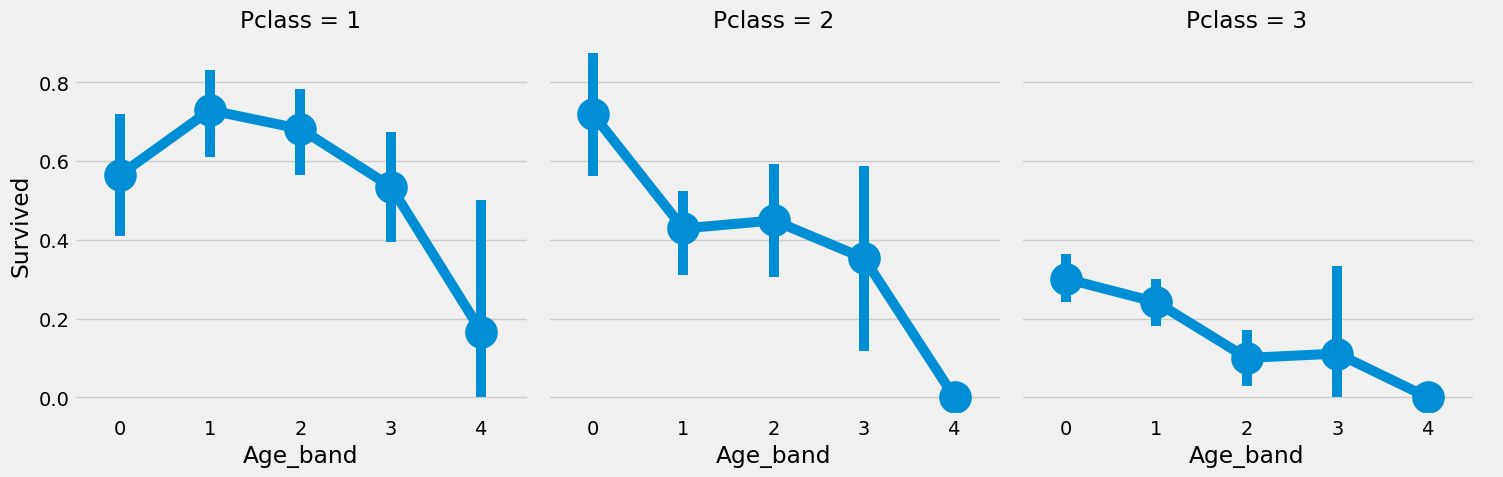

In [43]:
# 이제는 그래프도 찍어봅시다!
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

사실..객실 등급과 상관없이 나이가 들수록 생존율은 감소합니다.

## 대가족_규모 및 혼자
이 시점에서 "Family_size"와 "Alone"이라는 새로운 특성을 생성하고 분석할 수 있습니다. 이 기능은 부모·자녀 수와 형제·배우자 수를 합친 것입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. 혼자(Alone)는 승객이 혼자인지 아닌지를 나타냅니다.

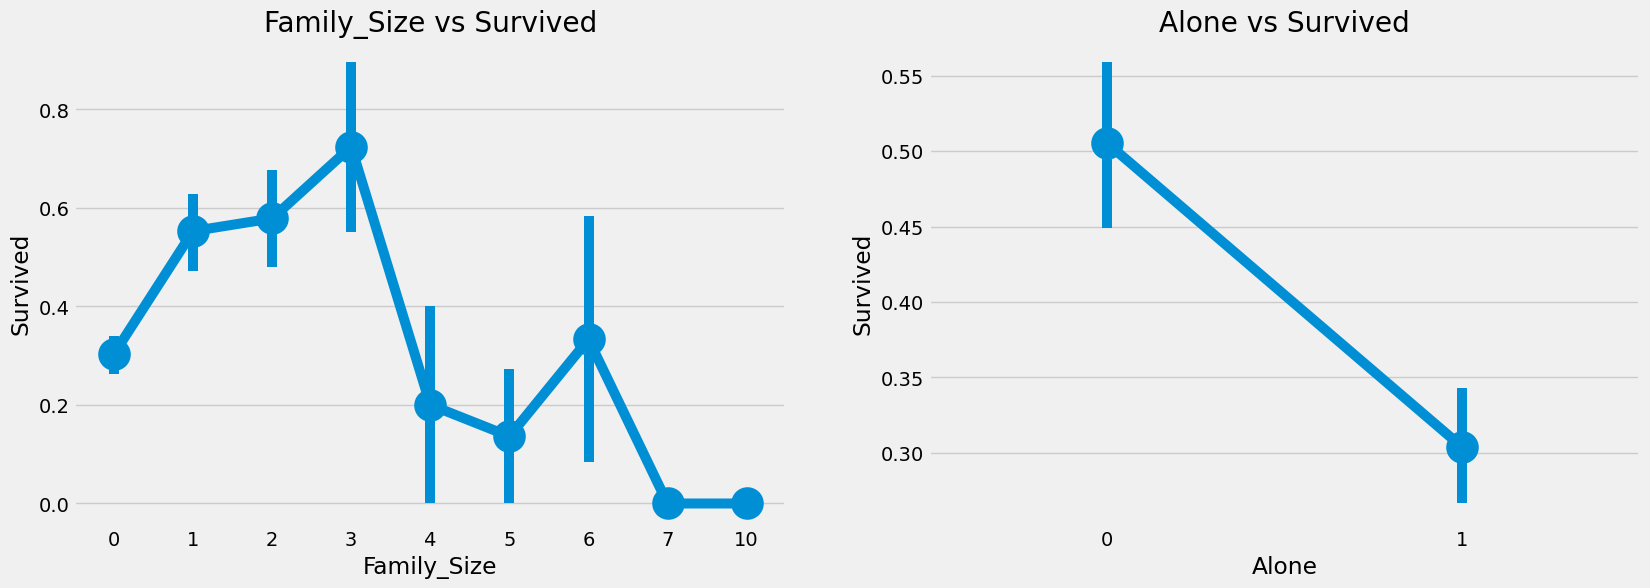

In [45]:
# 그래프 그리는거 익숙해지시죠??
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0은 승객이 혼자라는 의미입니다.** 확실히 혼자이거나 family_size=0인 경우 생존 가능성은 매우 낮습니다. 가족 규모가 4보다 크면 기회도 줄어듭니다. 이 역시 모델의 중요한 특징인 것 같습니다. 이를 더 자세히 살펴보겠습니다.

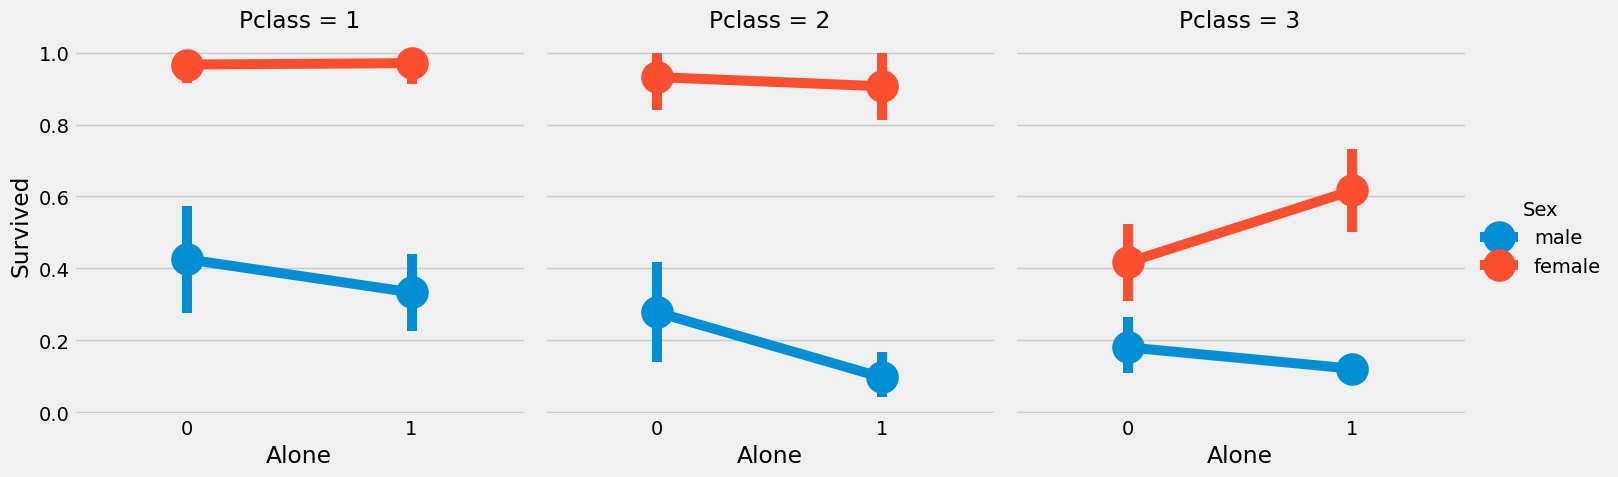

In [46]:
# 이정도도 찍어보기!
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

가족이 있는 여성에 비해 혼자 있는 여성의 확률이 높은 객실 등급3을 제외하고는 성별이나 객실 등급에 관계없이 혼자 있는 것이 해롭다는 것을 알 수 있습니다.

## 요금 범위

운임도 연속적인 특성이므로 ordinal 값으로 변환해야 합니다. 이를 위해 **pandas.qcut** 을 사용합니다.

따라서 **qcut** 이 하는 일은 우리가 통과한 bin 수에 따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 bin을 전달하면 값이 5개의 별도 bin 또는 값 범위에 동일한 간격으로 배열됩니다.

In [47]:
# qcut 활용하기!
# 1부터 100까지의 무작위 데이터
data = [1, 10, 20, 30, 40, 50, 60, 70, 80, 100]

# 3개의 구간으로 나누기
# q=3은 데이터를 33.3%씩 똑같은 개수로 나누겠다는 뜻입니다.
result = pd.qcut(data, q=3, labels=["Low", "Medium", "High"])

print(result)
# 결과 예시: ['Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High']
# (각 레이블의 개수가 비슷하게 분배됨)

['Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [55]:
# 뭔가 생김새가 좀 어려워보이네요.. 그렇죠..?
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

TypeError: list indices must be integers or slices, not str

위에서 논의한 바와 같이 **fare_range가 증가할수록 생존 가능성이 증가한다는 것을 명확하게 알 수 있습니다.**

이제 운임_Range 값을 그대로 전달할 수 없습니다. **Age_Band**에서 했던 것과 마찬가지로 싱글톤 값으로 변환해야 합니다.

In [51]:
# 운임 요금을 범주형 값으로 변경해볼게요! 아까부터 몇 번 진행했었죠?
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

TypeError: list indices must be integers or slices, not str

In [52]:
# 이제 찍어봅시다!
sns.pointplot(x='Fare_cat',y='Survived',data=data,hue='Sex')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

분명히 운임 비용이 증가할수록 생존 가능성도 높아집니다. 이 기능은 성별과 함께 모델링하는 동안 중요한 기능이 될 수 있습니다.

## 문자열 값을 숫자로 변환

문자열을 기계 학습 모델에 전달할 수 없으므로 Sex, 탑승 항구 등과 같은 기능을 숫자 값으로 변환해야 합니다.

In [56]:
# 아직 모델링은 안할거긴 하지만 replace 메소드를 이용해서 인코딩 하는건 알아둡시다!
# 인코딩이란 무엇일까요?
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

TypeError: list indices must be integers or slices, not str

### 불필요한 기능 삭제

**이름**--> 이름 기능은 범주형 값으로 변환할 수 없으므로 필요하지 않습니다.

**Age**--> Age_band 기능이 있으므로 이것이 필요하지 않습니다.

**티켓**--> 분류할 수 없는 임의의 문자열입니다.

**운임**--> 운임_cat 기능이 있으므로 필요하지 않습니다.

**객실**--> 많은 NaN 값과 많은 승객이 여러 객실을 보유하고 있습니다. 그래서 이것은 쓸모없는 기능입니다.

**운임_Range**--> 운임_cat 기능이 있습니다.

**승객 ID**--> 분류할 수 없습니다.

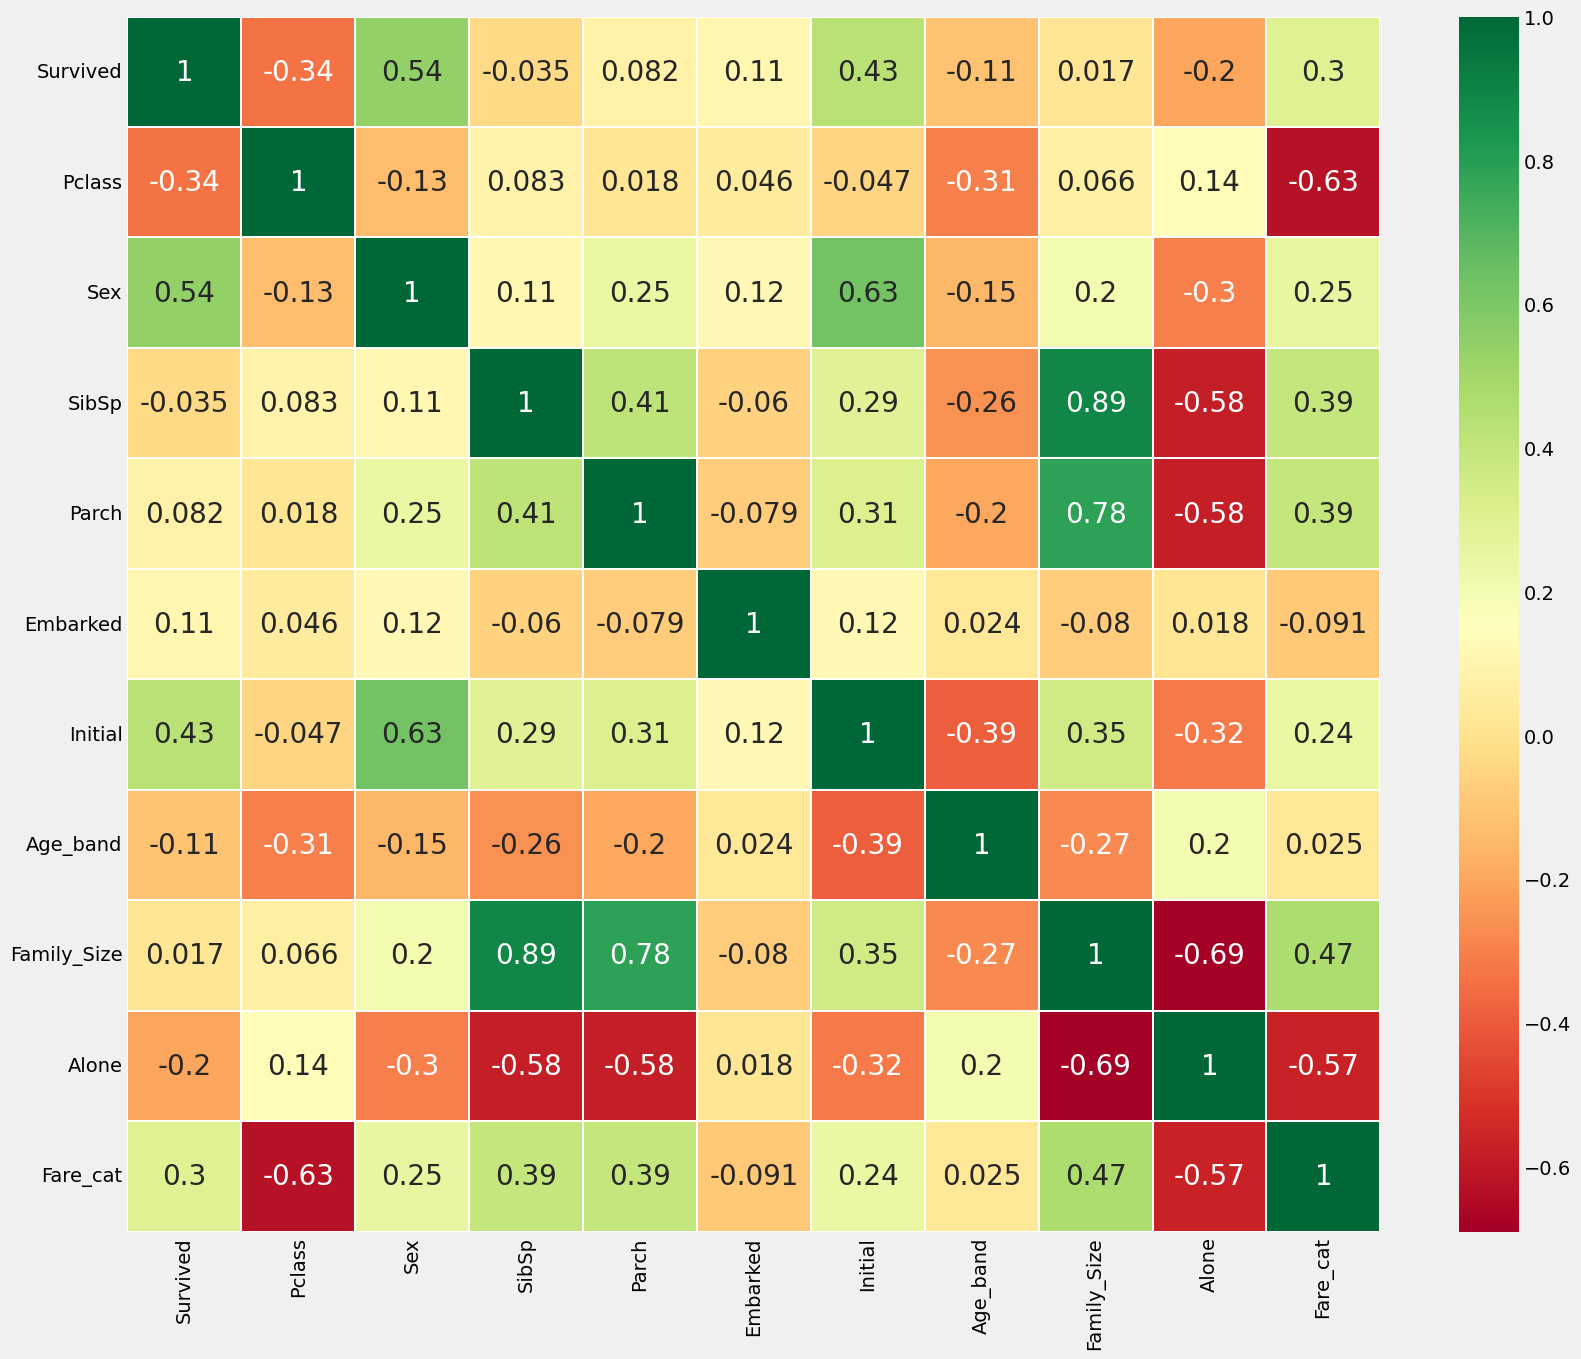

In [ ]:
# drop은 뭐였나요? 기억 나시나요?!
# heatmap을 통해서 결과값을 확인해봅시다!
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관 관계 플롯에서 양의 상관관계로 관련된 몇 가지 특징을 볼 수 있습니다. 그 중 일부는 **형제·배우자 수 및 Family_Size** 및 **부모·자녀 수 및 Family_Size**이고 일부는 **Alone 및 Family_Size**와 같은 음의 상관관계인 것입니다.